# Proyek Analisis Data
## Bike Sharing

#### Nama: Zeka Emo
#### ID Dicoding: zekaemo

# Mendefinisikan Pertanyaan



1. Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda?
2. Pada hari liburan, apakah ada kebiasaan yang berbeda dari kategori peminjam jika dibandingkan dengan hari biasa?
3. Pada sehari, pada pukul berapa sepeda paling banyak dipinjam?
4. Dalam seminggu, hari apa sepeda paling banyak dipinjam?
5. Bagaimana jumlah sepeda yang di pinjam ketika udara sedang sangat panas atau sangat dingin?



# Data Wrangling

In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [309]:
day_df = pd.read_csv('day.csv')
hour_df= pd.read_csv('hour.csv')

In [310]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [311]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Assessing

In [312]:
# Melihat informasi dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [313]:
# Melihat informasi dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [314]:
# Memeriksa apakah ada data yang kosong
day_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [315]:
hour_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [316]:
# Memeriksa apakah ada data yang terduplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())


Jumlah duplikasi:  0
Jumlah duplikasi:  0


In [317]:
# Melihat apakah ada data yang janggal
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [318]:
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Data Cleaning

1. Mengubah tipe data 'dteday' menjadi datetime
2. Mengubah tipe data 'season', 'mnth', 'weekday', dan 'weathersit' menjadi category
3. Mengubah value pada 'season', mnth', 'weathersit', 'day' , 'weekday', dan 'year' untuk mempermudah explatory data
4. Mengembalikan nilai 'temp', 'atemp', 'hum', dan 'windspeed' ke nilai sebenarnya
5. Menghapus kolom 'atemp' karena tidak diperlukan pada exploratory data
6. Mengubah nama variabel untuk mempermudah pembacaan

In [319]:
# Mengubah datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [320]:
# Mengubah category
columns = [ 'season', 'mnth', 'weekday', 'weathersit' ]
for column in columns:
    day_df[column] =  day_df[column].astype("category")
    hour_df[column] =  hour_df[column].astype("category")

day_df.info()
hour_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

In [321]:
# Mengubah value season
season_value = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Snow'
}

day_df['season'] = day_df['season'].map(season_value)
hour_df['season'] = hour_df['season'].map(season_value)


In [322]:
# Mengubah value mnth

mnth_value = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
day_df['mnth'] = day_df['mnth'].map(mnth_value)
hour_df['mnth'] = hour_df['mnth'].map(mnth_value)



In [323]:
# Mengubah value weathersit

weathers_value = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain Snow',
    4: 'Heavy Rain Snow'
}
day_df['weathersit'] = day_df['weathersit'].map(weathers_value)
hour_df['weathersit'] = hour_df['weathersit'].map(weathers_value)


In [324]:
# Mengubah value day
day_values = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

day_df['weekday'] = day_df['weekday'].map(day_values)
hour_df['weekday'] = hour_df['weekday'].map(day_values)


In [325]:
# Mengubah value yr
year_values = {
    0: '2011',
    1: '2012'
}

day_df['yr'] = day_df['yr'].map(year_values)
hour_df['yr'] = hour_df['yr'].map(year_values)


In [326]:
# Mengubah value holiday
holiday_values = {
    0: 'Off Season',
    1: 'Holiday'
}

day_df['holiday'] = day_df['holiday'].map(holiday_values)
hour_df['holiday'] = hour_df['holiday'].map(holiday_values)


In [327]:
# Mengembalikan temperature, humidity, dan wind_speed ke nilai bulat aslinya

day_df['temp'] = (day_df['temp'] * 41).round().astype(int)
day_df['hum'] = (day_df['hum'] * 100).round().astype(int)
day_df['windspeed'] = (day_df['windspeed'] * 67).round().astype(int)

hour_df['temp'] = (hour_df['temp'] * 41).round().astype(int)
hour_df['hum'] = (hour_df['hum'] * 100).round().astype(int)
hour_df['windspeed'] = (hour_df['windspeed'] * 67).round().astype(int)



In [328]:
# Menghapus 'atemp'
day_df = day_df.drop(columns = "atemp")
hou_df = hour_df.drop(columns = "atemp")

In [329]:
# Mengubah nama kolom pada day_df
day_df.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'weekday': 'day',
    'weathersit': 'weather_situation',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
}, inplace=True)

day_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'holiday', 'day',
       'workingday', 'weather_situation', 'temperature', 'humidity',
       'windspeed', 'casual', 'registered', 'count_total'],
      dtype='object')

In [330]:
# Mengubah nama kolom pada hour_df
hour_df.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_situation',
    'windspeed': 'wind_speed',
    'cnt': 'count_total',
    'hum': 'humidity',
    'temp': 'temperature',
    'hr': 'hour',
    'weekday': 'day'
}, inplace=True)

hour_df.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday', 'day',
       'workingday', 'weather_situation', 'temperature', 'atemp', 'humidity',
       'wind_speed', 'casual', 'registered', 'count_total'],
      dtype='object')

In [331]:
day_df.head()

,instant,date,season,year,month,holiday,day,workingday,weather_situation,temperature,humidity,windspeed,casual,registered,count_total
0,1,2011-01-01,Spring,2011,Januari,Off Season,Sabtu,0,Cloudy,14,81,11,331,654,985
1,2,2011-01-02,Spring,2011,Januari,Off Season,Minggu,0,Cloudy,15,70,17,131,670,801
2,3,2011-01-03,Spring,2011,Januari,Off Season,Senin,1,Clear,8,44,17,120,1229,1349
3,4,2011-01-04,Spring,2011,Januari,Off Season,Selasa,1,Clear,8,59,11,108,1454,1562
4,5,2011-01-05,Spring,2011,Januari,Off Season,Rabu,1,Clear,9,44,13,82,1518,1600


In [332]:
hour_df.head()

,instant,date,season,year,month,hour,holiday,day,workingday,weather_situation,temperature,atemp,humidity,wind_speed,casual,registered,count_total
0,1,2011-01-01,Spring,2011,Januari,0,Off Season,Sabtu,0,Clear,10,0.2879,81,0,3,13,16
1,2,2011-01-01,Spring,2011,Januari,1,Off Season,Sabtu,0,Clear,9,0.2727,80,0,8,32,40
2,3,2011-01-01,Spring,2011,Januari,2,Off Season,Sabtu,0,Clear,9,0.2727,80,0,5,27,32
3,4,2011-01-01,Spring,2011,Januari,3,Off Season,Sabtu,0,Clear,10,0.2879,75,0,3,10,13
4,5,2011-01-01,Spring,2011,Januari,4,Off Season,Sabtu,0,Clear,10,0.2879,75,0,0,1,1


# Exploratory Data Analysis

### Bagaimana cuaca mempengaruhi jumlah peminjaman sepeda

In [333]:
# Mengelompokkan data berdasarkan 'weather_situation'

weather_rents = hour_df.groupby('weather_situation', observed=True)['count_total'].sum().reset_index()
weather_rents_sorted = weather_rents.sort_values(by='count_total', ascending=False)
weather_rents_sorted


,weather_situation,count_total
0,Clear,2338173
1,Cloudy,795952
2,Light Rain Snow,158331
3,Heavy Rain Snow,223


#### Pada hari liburan, apakah ada kebiasaan yang berbeda dari kategori peminjam jika dibandingkan dengan hari biasa?

In [334]:
# Memfilter data berdasarkan liburan
holiday_data = hour_df[hour_df['holiday'] == "Holiday"]

# Menjumlahkan pengguna 'registered' dan 'casual' selama liburan
total_registered = holiday_data['registered'].mean().round().astype(int)
total_casual = holiday_data['casual'].mean().round().astype(int)

# Menjumlahkan pengguna 'registered' dan 'casual' selama tidak liburan
no_holiday_data = hour_df[hour_df['holiday'] == "Off Season"]
total_registered_no = no_holiday_data['registered'].mean().round().astype(int)
total_casual_no = no_holiday_data['casual'].mean().round().astype(int)

# Menampilkan hasil jumlah pengguna registered dan casual
print("Rata-rata pengguna yang sudah mendaftar pada liburan:", total_registered)
print("Rata-rata pengguna yang sudah mendaftar pada hari biasa:", total_registered_no)

print("Rata-rata pengguna yang belum mendaftar pada liburan", total_casual)
print("Rata-rata pengguna yang belum mendaftar pada hari biasa", total_casual_no)



Rata-rata pengguna yang sudah mendaftar pada liburan: 112
Rata-rata pengguna yang sudah mendaftar pada hari biasa: 155
Rata-rata pengguna yang belum mendaftar pada liburan 45
Rata-rata pengguna yang belum mendaftar pada hari biasa 35


### Pada sehari, pada pukul berapa sepeda paling banyak dipinjam?


In [335]:
time_rents = hour_df.groupby('hour', observed=True)['count_total'].mean().round().astype(int).reset_index()
time_rents_sorted = time_rents.sort_values(by='count_total', ascending=False)
time_rents_sorted

highest_rentals = time_rents.loc[time_rents['count_total'].idxmax()]
print("Sepeda lebih banyak dipinjam pada jam {}.00 dengan jumlah {} unit".format(highest_rentals['hour'], highest_rentals['count_total']))


Sepeda lebih banyak dipinjam pada jam 17.00 dengan jumlah 461 unit


### Dalam seminggu, hari apa sepeda paling banyak dipinjam?


In [336]:
# Mengelompokkan data berdasarkan 'day'
day_rents = hour_df.groupby('day', observed=True)['count_total'].mean().round().astype(int).reset_index()

# Mengurutkan berdasarkan jumlah total penyewaan
day_rents_sorted = day_rents.sort_values(by='count_total', ascending=False)

# Mencari hari dengan persewaan tertinggi
highest_rentals = day_rents.loc[day_rents['count_total'].idxmax()]

# Menampilkan hasil hari dengan persewaan tertinggi
print("Pada hari {} sepeda paling banyak dipinjam dengan rata-rata {} unit".format(highest_rentals['day'], highest_rentals['count_total']))


Pada hari Kamis sepeda paling banyak dipinjam dengan rata-rata 196 unit


### Bagaimana jumlah sepeda yang di pinjam ketika udara sedang sangat panas atau sangat dingin?

In [337]:
hour_df.describe()

,instant,date,hour,workingday,temperature,atemp,humidity,wind_speed,casual,registered,count_total
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.682721,20.358248,0.475775,62.722884,12.736233,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.000000,14.000000,0.333300,48.000000,7.000000,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,1.000000,20.000000,0.484800,63.000000,13.000000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,1.000000,27.000000,0.621200,78.000000,17.000000,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,41.000000,1.000000,100.000000,57.000000,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.465431,7.908098,0.171850,19.292983,8.196891,49.305030,151.357286,181.387599


### Bagaimana jumlah sepeda yang di pinjam ketika udara sedang sangat panas atau sangat dingin?

In [338]:
# Menghitung korelasi antara temperatur dan total_count
correlation = hour_df['temperature'].corr(hour_df['count_total'])
print("Korelasi antara temperatur dan total penyewaan:", correlation)


Korelasi antara temperatur dan total penyewaan: 0.4045027693376205


# Visualization Data

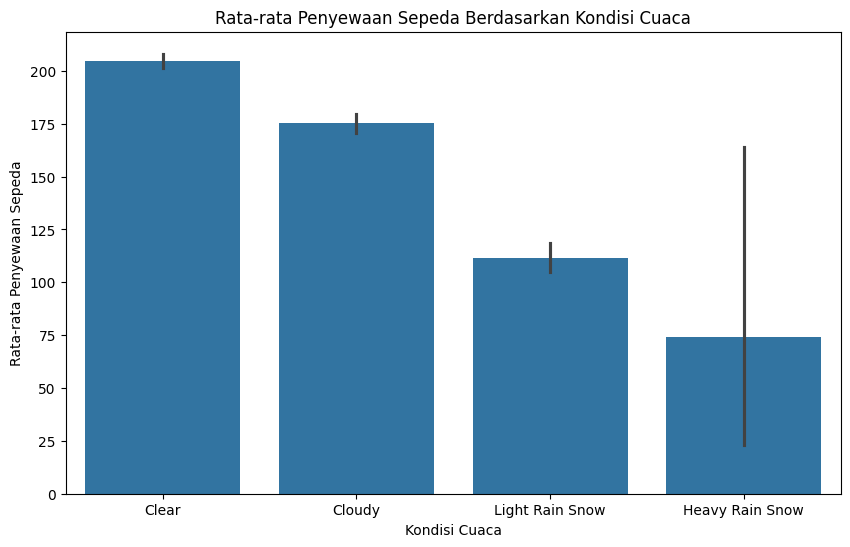

In [339]:
# Visualisasi rata-rata penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_situation', y='count_total', data=hour_df, legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


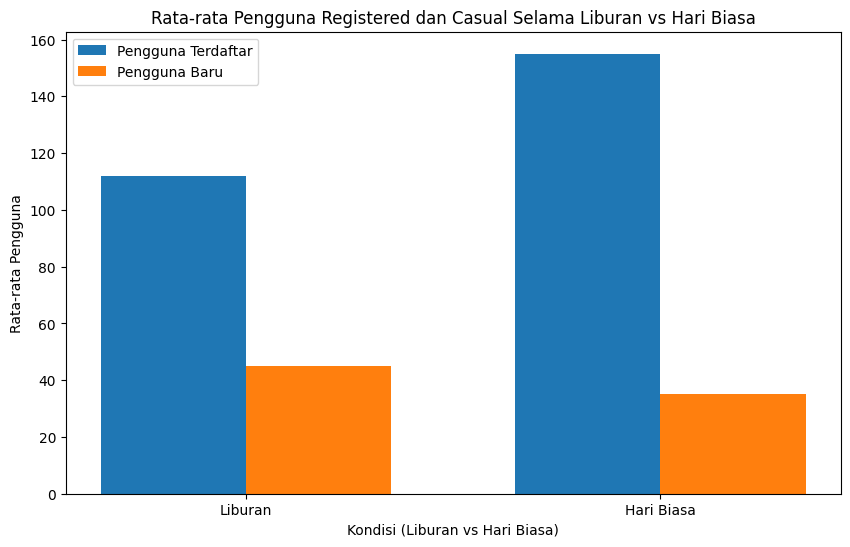

In [345]:
# Visualisasi jenis pengguna pada hari libur dan hari biasa
categories = ['Liburan', 'Hari Biasa']
registered_values = [total_registered, total_registered_no]
casual_values = [total_casual, total_casual_no]

# Design
x = np.arange(len(categories))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, registered_values, width, label='Pengguna Terdaftar')
ax.bar(x + width/2, casual_values, width, label='Pengguna Baru')
ax.set_xlabel('Kondisi (Liburan vs Hari Biasa)')
ax.set_ylabel('Rata-rata Pengguna')
ax.set_title('Rata-rata Pengguna Registered dan Casual Selama Liburan vs Hari Biasa')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


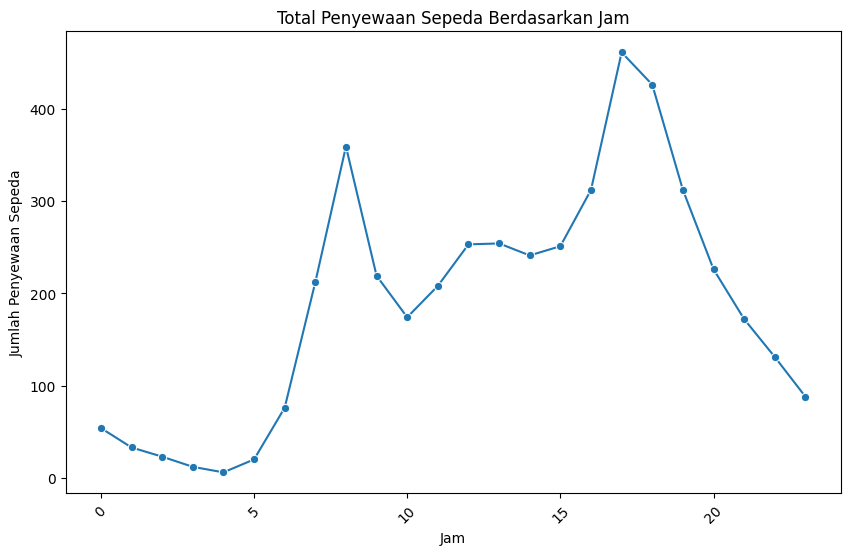

In [341]:
# Visualisasi penyewaan sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='count_total', data=time_rents, marker="o")
plt.title('Total Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.show()

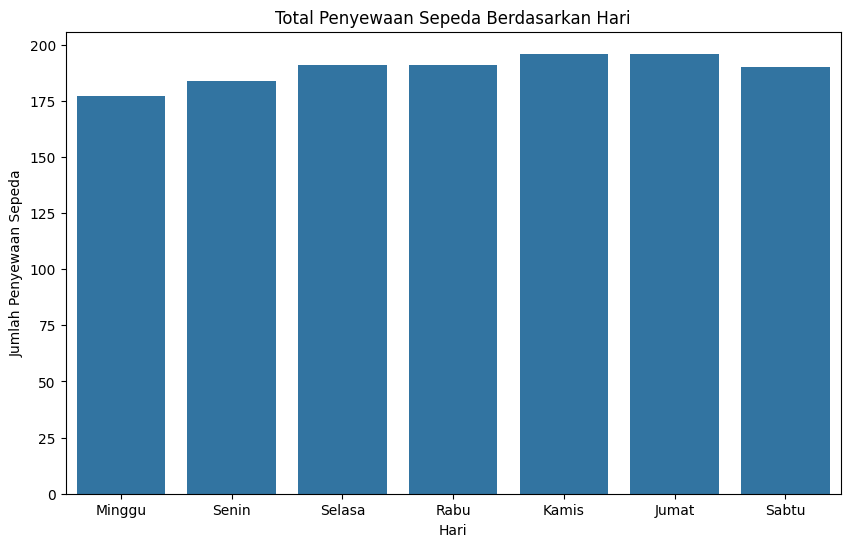

In [342]:
# Visualisasi penyewaan sepeda berdasarkan hari
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='count_total', data=day_rents)
plt.title('Total Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


## Korelasi suhu dan banyaknya penyewaan

In [343]:
# Binning
bins = [0, 10, 20, 30, 40]
labels = ['0-10°C', '11-20°C', '21-30°C', '31-40°C']
hour_df['temp_category'] = pd.cut(hour_df['temperature'], bins=bins, labels=labels, include_lowest=True)

temp_rentals = hour_df.groupby('temp_category')['count_total'].mean().round().astype(int).reset_index()
print(temp_rentals)


  temp_category  count_total
0        0-10°C           70
1       11-20°C          148
2       21-30°C          232
3       31-40°C          333


<ipython-input-343-4517706257d0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_rentals = hour_df.groupby('temp_category')['count_total'].mean().round().astype(int).reset_index()


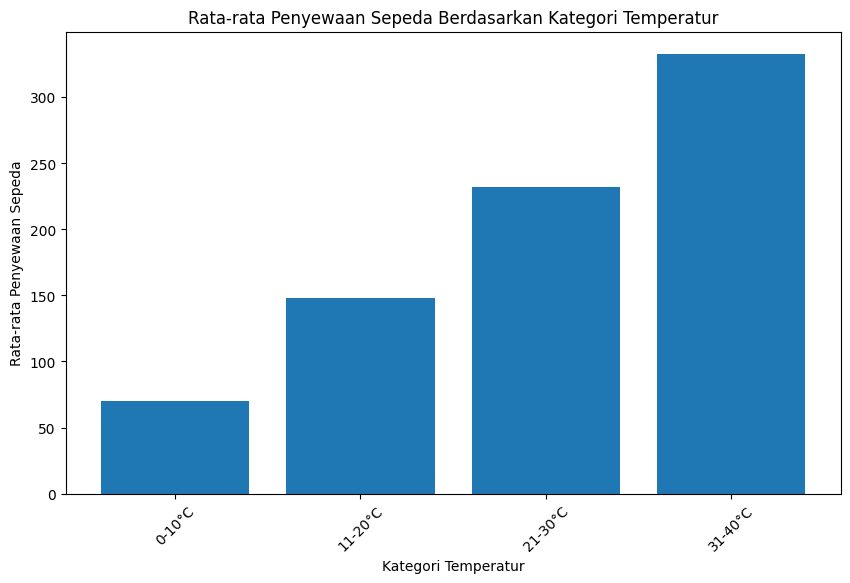

In [344]:
# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(temp_rentals['temp_category'], temp_rentals['count_total'])
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Temperatur')
plt.xlabel('Kategori Temperatur')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)

plt.show()


# Draw Conclusion

1. Sepeda paling banyak dipinjam saat cuaca sedang cloudy
2. Pada hari libur, pengguna baru mengalami peningkatan.
3. Rata-rata penyewaan sepeda paling banyak terdapat pada pukul 17.00
4. Hari kamis menjadi hari dengan penyewaan paling banyak dalam seminggu dalam rata-rata.
5. Pada proses binning, pengguna cenderung lebih banyak menyewa sepeda pada rentang suhu 31 sampai 40 derajat celcius.

